In [11]:
suppressMessages(library(dplyr))
library(shiny)
library(ggplot2)
library(statsr)

Loading required package: BayesFactor
Loading required package: coda
Loading required package: Matrix
************
Welcome to BayesFactor 0.9.12-4.2. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************


In [3]:
load("../data/ames.rda")

In [4]:
head(ames)

Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,⋯,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<fct>,<fct>,⋯,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
1,526301100,1656,215000,20,RL,141,31770,Pave,NA,⋯,0,0,NA,NA,NA,0,5,2010,WD,Normal
2,526350040,896,105000,20,RH,80,11622,Pave,NA,⋯,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
3,526351010,1329,172000,20,RL,81,14267,Pave,NA,⋯,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
4,526353030,2110,244000,20,RL,93,11160,Pave,NA,⋯,0,0,NA,NA,NA,0,4,2010,WD,Normal
5,527105010,1629,189900,60,RL,74,13830,Pave,NA,⋯,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
6,527105030,1604,195500,60,RL,78,9978,Pave,NA,⋯,0,0,NA,NA,NA,0,6,2010,WD,Normal


In [12]:
df <- ames %>% select(area, price)

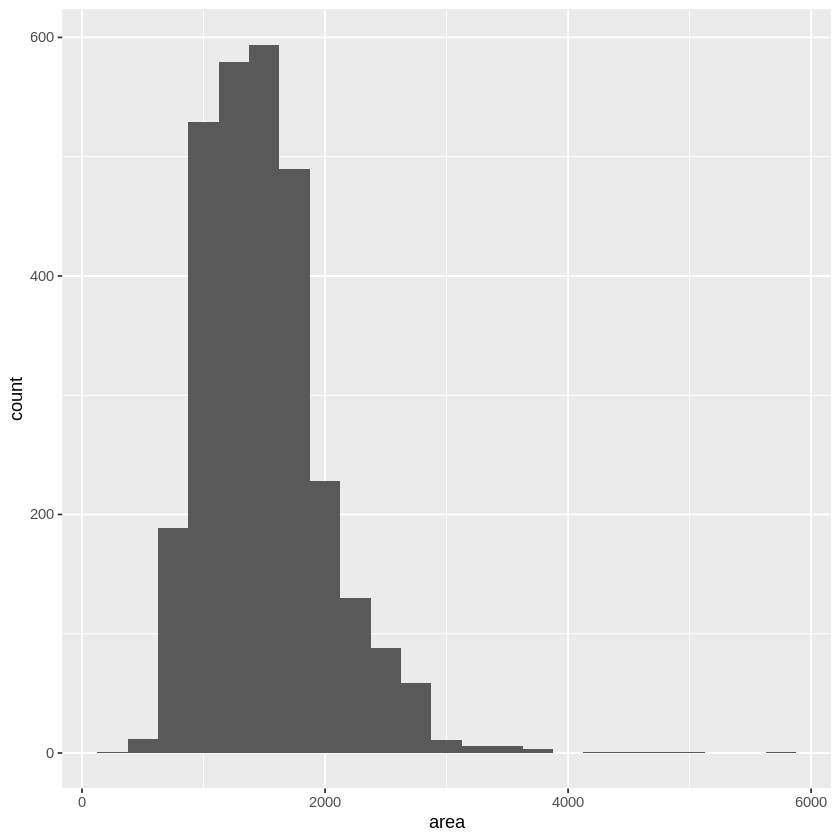

In [13]:
ggplot(data = df, aes(x = area)) +
  geom_histogram(binwidth = 250)

In [14]:
df %>%
  summarise(mu = mean(area), pop_med = median(area), 
            sigma = sd(area), pop_iqr = IQR(area),
            pop_min = min(area), pop_max = max(area),
            pop_q1 = quantile(area, 0.25),  # first quartile, 25th percentile
            pop_q3 = quantile(area, 0.75))  # third quartile, 75th percentile

mu,pop_med,sigma,pop_iqr,pop_min,pop_max,pop_q1,pop_q3
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
1499.69,1442,505.5089,616.75,334,5642,1126,1742.75


### Answer to question 1 

I don't know
    

In [17]:
samp1 <- df %>%
  sample_n(size = 50)

In [25]:
samp1 %>%
  summarise(x_bar = mean(area), pop_med = median(area), 
            sighat = sd(area), pop_iqr = IQR(area),
            pop_min = min(area), pop_max = max(area),
            pop_q1 = quantile(area, 0.25),  # first quartile, 25th percentile
            pop_q3 = quantile(area, 0.75))

x_bar,pop_med,sighat,pop_iqr,pop_min,pop_max,pop_q1,pop_q3
<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<dbl>,<dbl>
1568.76,1589,445.2928,581.25,694,2640,1203,1784.25


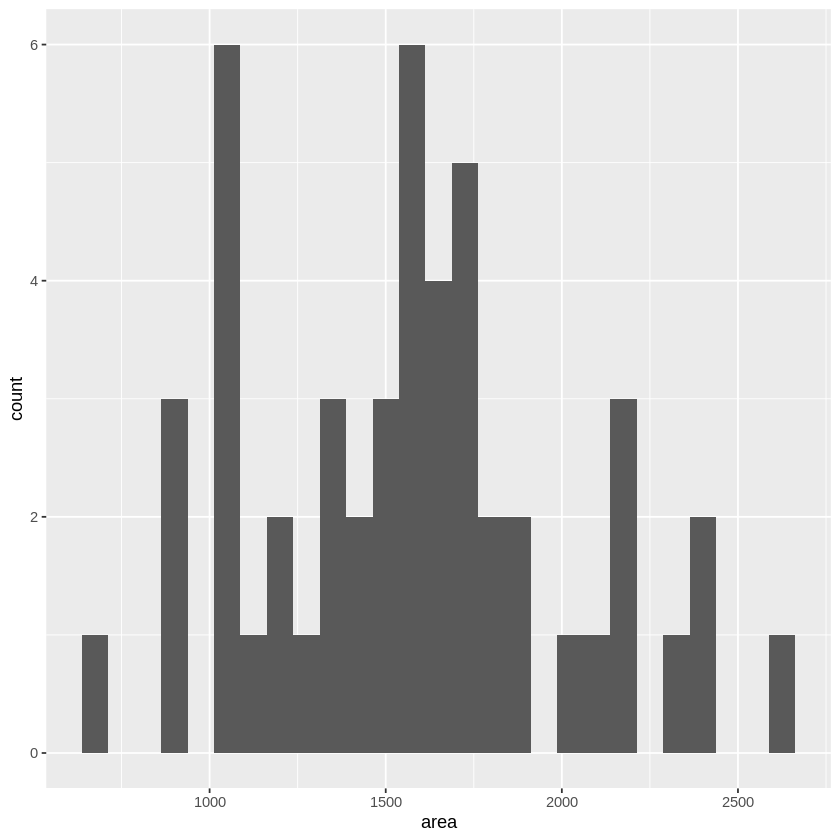

In [24]:
ggplot(data = samp1, aes(x = area)) +
  geom_histogram(binwidth = 75)

### Question 2

C - the higher sample number

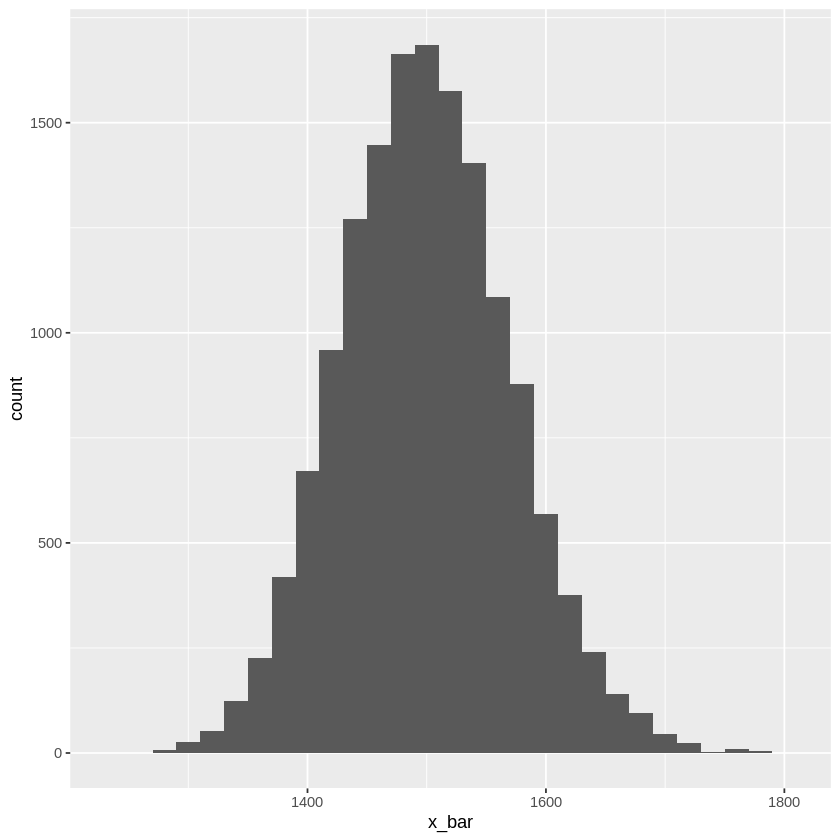

In [26]:
sample_means50 <- ames %>%
                    rep_sample_n(size = 50, reps = 15000, replace = TRUE) %>%
                    summarise(x_bar = mean(area))

ggplot(data = sample_means50, aes(x = x_bar)) +
  geom_histogram(binwidth = 20)

In [27]:
nrow(sample_means50)

[1] 15000

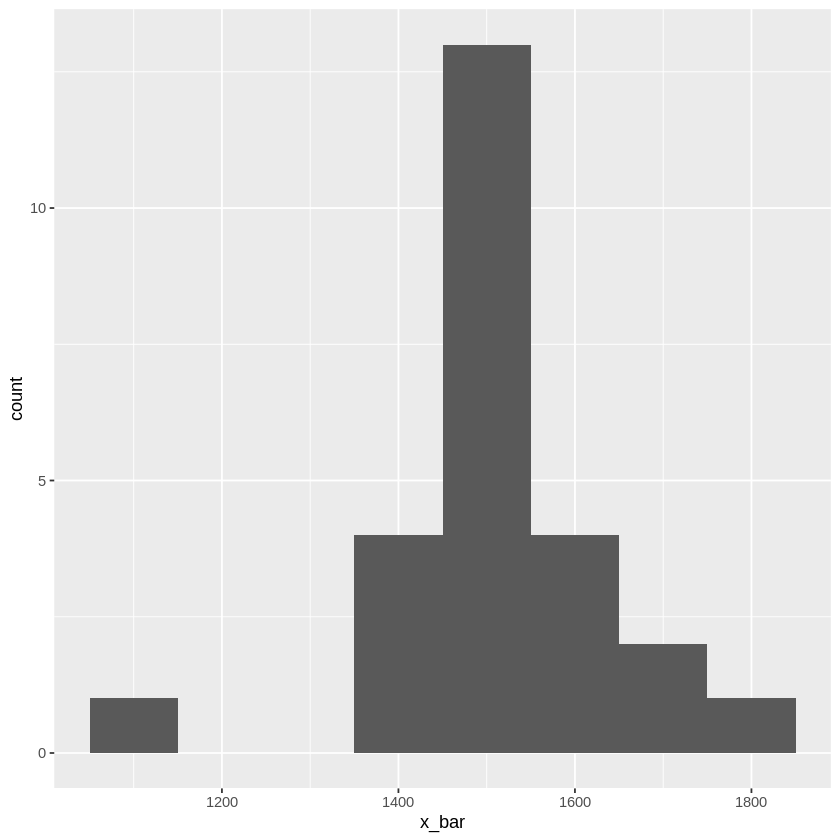

In [35]:
sample_means_small <- ames %>%
                    rep_sample_n(size = 10, reps = 25, replace = TRUE) %>%
                    summarise(x_bar = mean(area))

ggplot(data = sample_means_small, aes(x = x_bar)) +
  geom_histogram(binwidth = 100)

### 3. There are 25 elements in this sample

In [37]:
lengths(sample_means_small)

replicate     x_bar 
       25        25

### 4. Each element repressents the mean square-footage of a simple-random sample of 10 houses

### 5. Variability of sampling distribution decreases

# Switched over to Rstudio due to incapatability with shinyapp